In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from torchvision import transforms as T, datasets

normalize = T.Normalize([0.5], [0.5])

img_size = 28

transforms = T.Compose([
    T.Resize((img_size, img_size)),
    T.ToTensor(),
    normalize
])

In [6]:
data_train = datasets.MNIST(root='data/train', train=True, download=True, transform=transforms)
data_test = datasets.MNIST(root='data/test', train=False, download=True, transform=transforms)

# ReLU

In [118]:
import torch
import torch.nn as nn

class SomeReLU(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __call__(self, x):
        return torch.maximum(x, torch.zeros(x.shape).to(x.device))
    
some_data = torch.randn((5, 5))

my_relu = SomeReLU()
my_relu_res = my_relu(some_data)
my_relu_res

tensor([[0.7663, 0.0565, 0.0000, 0.3264, 0.0000],
        [0.0000, 0.0000, 0.2186, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.3395, 1.7463, 2.0099, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4192, 0.2428]])

In [119]:
# compare results with torch relu

relu = nn.ReLU()
torch_relu_res = relu(some_data)
print(torch_relu_res)

assert np.allclose(my_relu_res, torch_relu_res)

tensor([[0.7663, 0.0565, 0.0000, 0.3264, 0.0000],
        [0.0000, 0.0000, 0.2186, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.3395, 1.7463, 2.0099, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4192, 0.2428]])


# Softplus

In [120]:
class SomeSoftplus(nn.Module):
    def __init__(self, beta=1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.beta = beta

    def __call__(self, x):
        return (1 / self.beta) * torch.log(torch.exp(self.beta * x) + 1)

my_softplus = SomeSoftplus(beta=1)
my_softplus_res = my_softplus(some_data)
my_softplus_res

tensor([[1.1480, 0.7218, 0.2434, 0.8696, 0.3046],
        [0.1037, 0.3792, 0.8084, 0.5666, 0.1459],
        [0.3755, 0.5001, 0.3526, 0.2304, 0.3286],
        [0.3898, 1.5721, 1.9071, 2.1356, 0.3879],
        [0.4931, 0.6013, 0.5085, 0.9245, 0.8219]])

In [121]:
# compare with torch softplus

torch_softplus = nn.Softplus(beta=1)
torch_softplus_res = torch_softplus(some_data)
print(torch_softplus_res)

assert np.allclose(torch_softplus_res, my_softplus_res)

tensor([[1.1480, 0.7218, 0.2434, 0.8696, 0.3046],
        [0.1037, 0.3792, 0.8084, 0.5666, 0.1459],
        [0.3755, 0.5001, 0.3526, 0.2304, 0.3286],
        [0.3898, 1.5721, 1.9071, 2.1356, 0.3879],
        [0.4931, 0.6013, 0.5085, 0.9245, 0.8219]])


# GELU

In [122]:
from torch.distributions import Normal

class SomeGELU(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __call__(self, x):
        distrib = Normal(loc=0, scale=1)
        return x * distrib.cdf(x)
    
my_gelu = SomeGELU()
my_gelu_res = my_gelu(some_data)
my_gelu_res

tensor([[ 0.5964,  0.0295, -0.1273,  0.2050, -0.1558],
        [-0.0297, -0.1699,  0.1282, -0.1067, -0.0594],
        [-0.1697, -0.1439, -0.1676, -0.1194, -0.1629],
        [-0.1699,  1.2186,  1.6758,  1.9652, -0.1700],
        [-0.1469, -0.0817, -0.1400,  0.2777,  0.1447]])

In [123]:
torch_gelu = nn.GELU()
torch_gelu_res = torch_gelu(some_data)
print(torch_gelu_res)

assert np.allclose(torch_gelu_res, my_gelu_res)

tensor([[ 0.5964,  0.0295, -0.1273,  0.2050, -0.1558],
        [-0.0297, -0.1699,  0.1282, -0.1067, -0.0594],
        [-0.1697, -0.1439, -0.1676, -0.1194, -0.1629],
        [-0.1699,  1.2186,  1.6758,  1.9652, -0.1700],
        [-0.1469, -0.0817, -0.1400,  0.2777,  0.1447]])


# Swish

In [124]:
from torch.nn.functional import sigmoid

class SomeSwish(nn.Module):
    def __init__(self, beta=1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.beta = beta

    def __call__(self, x):
        return x * sigmoid(self.beta * x)
    
my_swish = SomeSwish()
my_swish_res = my_swish(some_data)
my_swish_res

tensor([[ 0.5232,  0.0291, -0.2785,  0.1896, -0.2711],
        [-0.2181, -0.2443,  0.1212, -0.1174, -0.2513],
        [-0.2460, -0.1702, -0.2558, -0.2779, -0.2644],
        [-0.2392,  1.0614,  1.4870,  1.7724, -0.2401],
        [-0.1753, -0.0872, -0.1640,  0.2529,  0.1361]])

In [125]:
torch_swish = nn.SiLU()
torch_swish_res = torch_swish(some_data)
print(torch_swish_res)

assert np.allclose(torch_swish_res, my_swish_res)

tensor([[ 0.5232,  0.0291, -0.2785,  0.1896, -0.2711],
        [-0.2181, -0.2443,  0.1212, -0.1174, -0.2513],
        [-0.2460, -0.1702, -0.2558, -0.2779, -0.2644],
        [-0.2392,  1.0614,  1.4870,  1.7724, -0.2401],
        [-0.1753, -0.0872, -0.1640,  0.2529,  0.1361]])


# CNN

In [126]:
n_classes = len(data_train.classes)

class CNN(nn.Module):
    def __init__(self, activation=SomeReLU(), *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.activation = activation
        self.backbone = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            activation,
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            activation,
            nn.AdaptiveMaxPool2d((1, 1))
        )
        self.head = nn.Linear(64, n_classes)

    def __call__(self, x):
        x = self.backbone(x)
        x = torch.flatten(x, 1)
        return self.head(x)

In [127]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [137]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=False)

In [138]:
# test the model

model = CNN(activation=SomeReLU())
batch, _ = next(iter(train_loader))
model(batch)

tensor([[ 0.1629,  0.3977,  0.6261, -0.2645, -0.7055, -0.6813, -0.3873,  0.2057,
         -1.2093, -0.6074],
        [ 0.5591,  0.4369,  0.9486, -0.1241, -0.6721, -0.9894, -0.7093,  0.3434,
         -1.4732, -0.5984],
        [ 0.4829,  0.4717,  0.6936, -0.4703, -0.8142, -0.8311, -0.6384,  0.3039,
         -1.1059, -0.5265],
        [ 0.2527,  0.3485,  0.7608, -0.2196, -0.7848, -0.8127, -0.5980,  0.2879,
         -1.3399, -0.6278],
        [ 0.5231,  0.3250,  0.7091, -0.2233, -0.6809, -0.6674, -0.3313,  0.2403,
         -1.2702, -0.5405],
        [ 0.2920,  0.2084,  0.6434, -0.2885, -0.6525, -0.4869, -0.3539,  0.2113,
         -1.0393, -0.3465],
        [ 0.1452,  0.2766,  0.6368, -0.1741, -0.7612, -0.6305, -0.3178,  0.1800,
         -1.0511, -0.3763],
        [ 0.5333,  0.4196,  0.9811, -0.3259, -0.9239, -0.8034, -0.4783,  0.1982,
         -1.5620, -0.4208],
        [ 0.5592,  0.5090,  0.9080, -0.2668, -0.8378, -1.0083, -0.6451,  0.3679,
         -1.4023, -0.5269],
        [ 0.4127,  

In [139]:
model = CNN(activation=SomeReLU()).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [140]:
# training loop
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score

epochs = 5

def train_model(model):
    model.train()
    track_loss = []

    for (data, labels) in tqdm(train_loader):
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        track_loss.append(loss.item())

    return np.mean(track_loss)

def test_model(model, return_targets=False):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for (data, labels) in tqdm(test_loader):
            data, labels = data.to(device), labels.to(device)

            pred = model(data)
            pred_probs = torch.softmax(pred, dim=1)
            pred_labels = torch.argmax(pred_probs, dim=1)

            y_true += labels.detach().cpu()
            y_pred += pred_labels.detach().cpu()

    if return_targets:
      return y_true, y_pred
    else:
      return f1_score(y_true, y_pred, average='macro'), accuracy_score(y_true, y_pred)
    
def training_loop(model):
    loss, f1_score, acc_score = [], [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch}")

        print("Training model")
        epoch_loss = train_model(model)
        loss.append(epoch_loss)
        print(f"Train loss: {epoch_loss}")

        print("Testing model")
        epoch_f1_score, epoch_acc_score = test_model(model)
        f1_score.append(epoch_f1_score)
        acc_score.append(epoch_acc_score)
        print(f"F1-score: {epoch_f1_score}")
        print(f"accuracy_score: {epoch_acc_score}\n")

    return loss, f1_score, acc_score

In [141]:
# model with relu

relu_loss, relu_f1, relu_acc = training_loop(model)

Epoch 0
Training model


100%|██████████| 1875/1875 [00:54<00:00, 34.21it/s]


Train loss: 0.423150571791331
Testing model


100%|██████████| 313/313 [00:07<00:00, 40.66it/s]


F1-score: 0.9439208929899563
accuracy_score: 0.9448

Epoch 1
Training model


100%|██████████| 1875/1875 [01:06<00:00, 28.25it/s]


Train loss: 0.1622329857657353
Testing model


100%|██████████| 313/313 [00:09<00:00, 32.32it/s]


F1-score: 0.9574452125017581
accuracy_score: 0.9579

Epoch 2
Training model


100%|██████████| 1875/1875 [01:11<00:00, 26.06it/s]


Train loss: 0.13354608913014332
Testing model


100%|██████████| 313/313 [00:09<00:00, 34.43it/s]


F1-score: 0.9589975084709328
accuracy_score: 0.9594

Epoch 3
Training model


100%|██████████| 1875/1875 [01:01<00:00, 30.60it/s]


Train loss: 0.11710417918736736
Testing model


100%|██████████| 313/313 [00:09<00:00, 32.04it/s]


F1-score: 0.9582043750728368
accuracy_score: 0.9586

Epoch 4
Training model


100%|██████████| 1875/1875 [01:02<00:00, 29.85it/s]


Train loss: 0.1093809526120623
Testing model


100%|██████████| 313/313 [00:08<00:00, 35.69it/s]


F1-score: 0.9616276133065907
accuracy_score: 0.962



In [145]:
# model with softplus

model = CNN(activation=SomeSoftplus()).to(device)
optimizer = torch.optim.Adam(model.parameters())

softplus_loss, softplus_f1, softplus_acc = training_loop(model)

Epoch 0
Training model


100%|██████████| 1875/1875 [00:37<00:00, 50.16it/s]


Train loss: 0.5352426802694797
Testing model


100%|██████████| 313/313 [00:06<00:00, 45.62it/s]


F1-score: 0.9310624386959543
accuracy_score: 0.9321

Epoch 1
Training model


100%|██████████| 1875/1875 [00:56<00:00, 32.94it/s]


Train loss: 0.20164229804476103
Testing model


100%|██████████| 313/313 [00:09<00:00, 33.97it/s]


F1-score: 0.9482378866100267
accuracy_score: 0.9488

Epoch 2
Training model


100%|██████████| 1875/1875 [00:54<00:00, 34.32it/s]


Train loss: 0.17040325628370045
Testing model


100%|██████████| 313/313 [00:10<00:00, 31.28it/s]


F1-score: 0.9540938122781855
accuracy_score: 0.9546

Epoch 3
Training model


100%|██████████| 1875/1875 [01:00<00:00, 30.81it/s]


Train loss: 0.15168602755541602
Testing model


100%|██████████| 313/313 [00:07<00:00, 42.21it/s]


F1-score: 0.9492154954427793
accuracy_score: 0.9498

Epoch 4
Training model


100%|██████████| 1875/1875 [01:00<00:00, 31.06it/s]


Train loss: 0.13843902943556508
Testing model


100%|██████████| 313/313 [00:08<00:00, 38.81it/s]


F1-score: 0.9491732580921551
accuracy_score: 0.9497



In [146]:
# model with gelu

model = CNN(activation=SomeGELU()).to(device)
optimizer = torch.optim.Adam(model.parameters())

gelu_loss, gelu_f1, gelu_acc = training_loop(model)

Epoch 0
Training model


100%|██████████| 1875/1875 [01:18<00:00, 23.92it/s]


Train loss: 0.4007731980582078
Testing model


100%|██████████| 313/313 [00:09<00:00, 32.80it/s]


F1-score: 0.9444380589690882
accuracy_score: 0.9452

Epoch 1
Training model


100%|██████████| 1875/1875 [01:44<00:00, 17.99it/s]


Train loss: 0.16091818983505168
Testing model


100%|██████████| 313/313 [00:08<00:00, 37.37it/s]


F1-score: 0.9521497465053951
accuracy_score: 0.9527

Epoch 2
Training model


100%|██████████| 1875/1875 [01:08<00:00, 27.44it/s]


Train loss: 0.1282151329688728
Testing model


100%|██████████| 313/313 [00:11<00:00, 27.50it/s]


F1-score: 0.9581171995575014
accuracy_score: 0.9585

Epoch 3
Training model


100%|██████████| 1875/1875 [01:28<00:00, 21.14it/s]


Train loss: 0.11595779703718921
Testing model


100%|██████████| 313/313 [00:11<00:00, 26.51it/s]


F1-score: 0.9608228142310982
accuracy_score: 0.9613

Epoch 4
Training model


100%|██████████| 1875/1875 [01:08<00:00, 27.56it/s]


Train loss: 0.10256763491164893
Testing model


100%|██████████| 313/313 [00:09<00:00, 32.91it/s]


F1-score: 0.9647615344880164
accuracy_score: 0.965



In [147]:
# model with swish

model = CNN(activation=SomeSwish()).to(device)
optimizer = torch.optim.Adam(model.parameters())

swish_loss, swish_f1, swish_acc = training_loop(model)

Epoch 0
Training model


100%|██████████| 1875/1875 [00:53<00:00, 35.09it/s]


Train loss: 0.3846243921349446
Testing model


100%|██████████| 313/313 [00:06<00:00, 45.74it/s]


F1-score: 0.9476506178229048
accuracy_score: 0.9484

Epoch 1
Training model


100%|██████████| 1875/1875 [00:56<00:00, 32.94it/s]


Train loss: 0.15207218821222585
Testing model


100%|██████████| 313/313 [00:07<00:00, 39.62it/s]


F1-score: 0.9604550450644854
accuracy_score: 0.9609

Epoch 2
Training model


100%|██████████| 1875/1875 [01:01<00:00, 30.67it/s]


Train loss: 0.1285859282679856
Testing model


100%|██████████| 313/313 [00:10<00:00, 30.24it/s]


F1-score: 0.9580769619091845
accuracy_score: 0.9586

Epoch 3
Training model


100%|██████████| 1875/1875 [00:57<00:00, 32.46it/s]


Train loss: 0.11361534003218016
Testing model


100%|██████████| 313/313 [00:06<00:00, 47.11it/s]


F1-score: 0.9633442399947769
accuracy_score: 0.9636

Epoch 4
Training model


100%|██████████| 1875/1875 [00:50<00:00, 36.85it/s]


Train loss: 0.1016205799009651
Testing model


100%|██████████| 313/313 [00:08<00:00, 37.96it/s]


F1-score: 0.9656142297671402
accuracy_score: 0.966



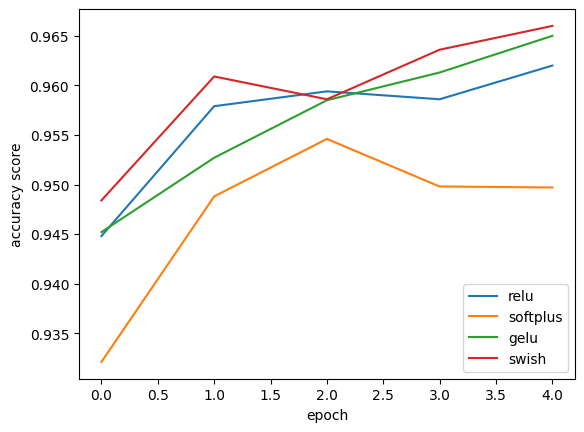

In [148]:
plt.plot(relu_acc, label='relu')
plt.plot(softplus_acc, label='softplus')
plt.plot(gelu_acc, label='gelu')
plt.plot(swish_acc, label='swish')
plt.xlabel('epoch')
plt.ylabel('accuracy score')
plt.legend()
plt.show()